# Übung 9: Machine Learning mit Support Vector Machines (SVM)

##  Support Vector Machine

In dieser Übung wollen wir Support Vector Machines betrachten. Obwohl auch OpenCV eine Implementation von SVMs beinhaltet möchten wir diesmal die Python Implementation von scikit-learn verwenden. Dazu müsses Sie allenfalls noch das enstprechende Packet mittels `pip3 install sklearn` installieren.

In [16]:
# OpenCV needs to be included first
import cv2
import numpy as np

# we will use the svm from sklearn
from sklearn import svm

# for displaying images in jupyter

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.dpi']= 200


In einer früheren Übung haben wir von unseren Photobox Bildern mit grünen Hintergrund die Hände vom Hintergrund mittels Farbsegemtnierung getrennt. Die Bereiche mussten wir dabei selber finden. In dieser Übung möchten wir eine SVM einsetzen um diese Klassifizierung zu machen.

Zuerst wollen wir die Bilder laden und darstellen.

(576, 864, 3)
(576, 864, 3)


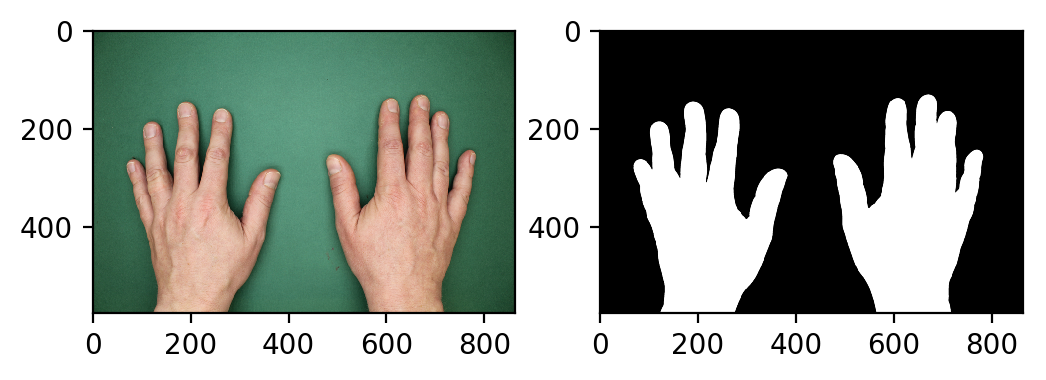

In [17]:
image  = cv2.imread('images/hand_small.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
label = cv2.imread('images/label_small.png')
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(label)
print(image.shape)
print(label.shape)

### Aufgabe 1: Linear SVM

Als Features für die SVM wollen wir 2D Daten benutzen um sie besser darstellen zu können. Da die Segmentierung auf den Farben basieren soll, zum Beispiel Hue und Saturation. Wir müssen also das Bild in HSV umwandeln.

Die SVM braucht keine Bilddaten, sondern nur ein Array von Werten.


In [18]:
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
hs = hsv[:,:,0:2]
data = hs.reshape((-1,2))

Wir brauchen die Labels in der gleichen Form.

In [19]:
label_grey = label[:,:,0]
classes = label_grey.reshape(-1)
print(classes.shape)

(497664,)


Da wir Pixel für die Trainingsdaten verwenden, erhalten wir sehr viele Trainings Daten. Für die SVM wird das recht aufwendig, deshalben sollten wir erst mal die Anzahl Daten reduzieren in dem wir nur jedes n-te Pixel nehmen. Späten können wir n verändern um bessere Ergebnisse mit mehr Trainingsdaten zu erhalten.

In [20]:
n = 1000
classes_reduced = classes[1::n]
data_reduced = data_float[1::n,:]
print(classes_reduced.shape)
print(data_reduced.shape)

(498,)
(498, 2)


Wir können die Features nun als Scatterplot darstellen. Dazu möchten wir die Daten zuerst noch in die positiven und negativen Beispiele unterteilen.

In [21]:
positives = data_reduced[classes_reduced==0]
negatives = data_reduced[classes_reduced==255]
print(positives.shape)
print(negatives.shape)

(336, 2)
(157, 2)


und nun der Plot

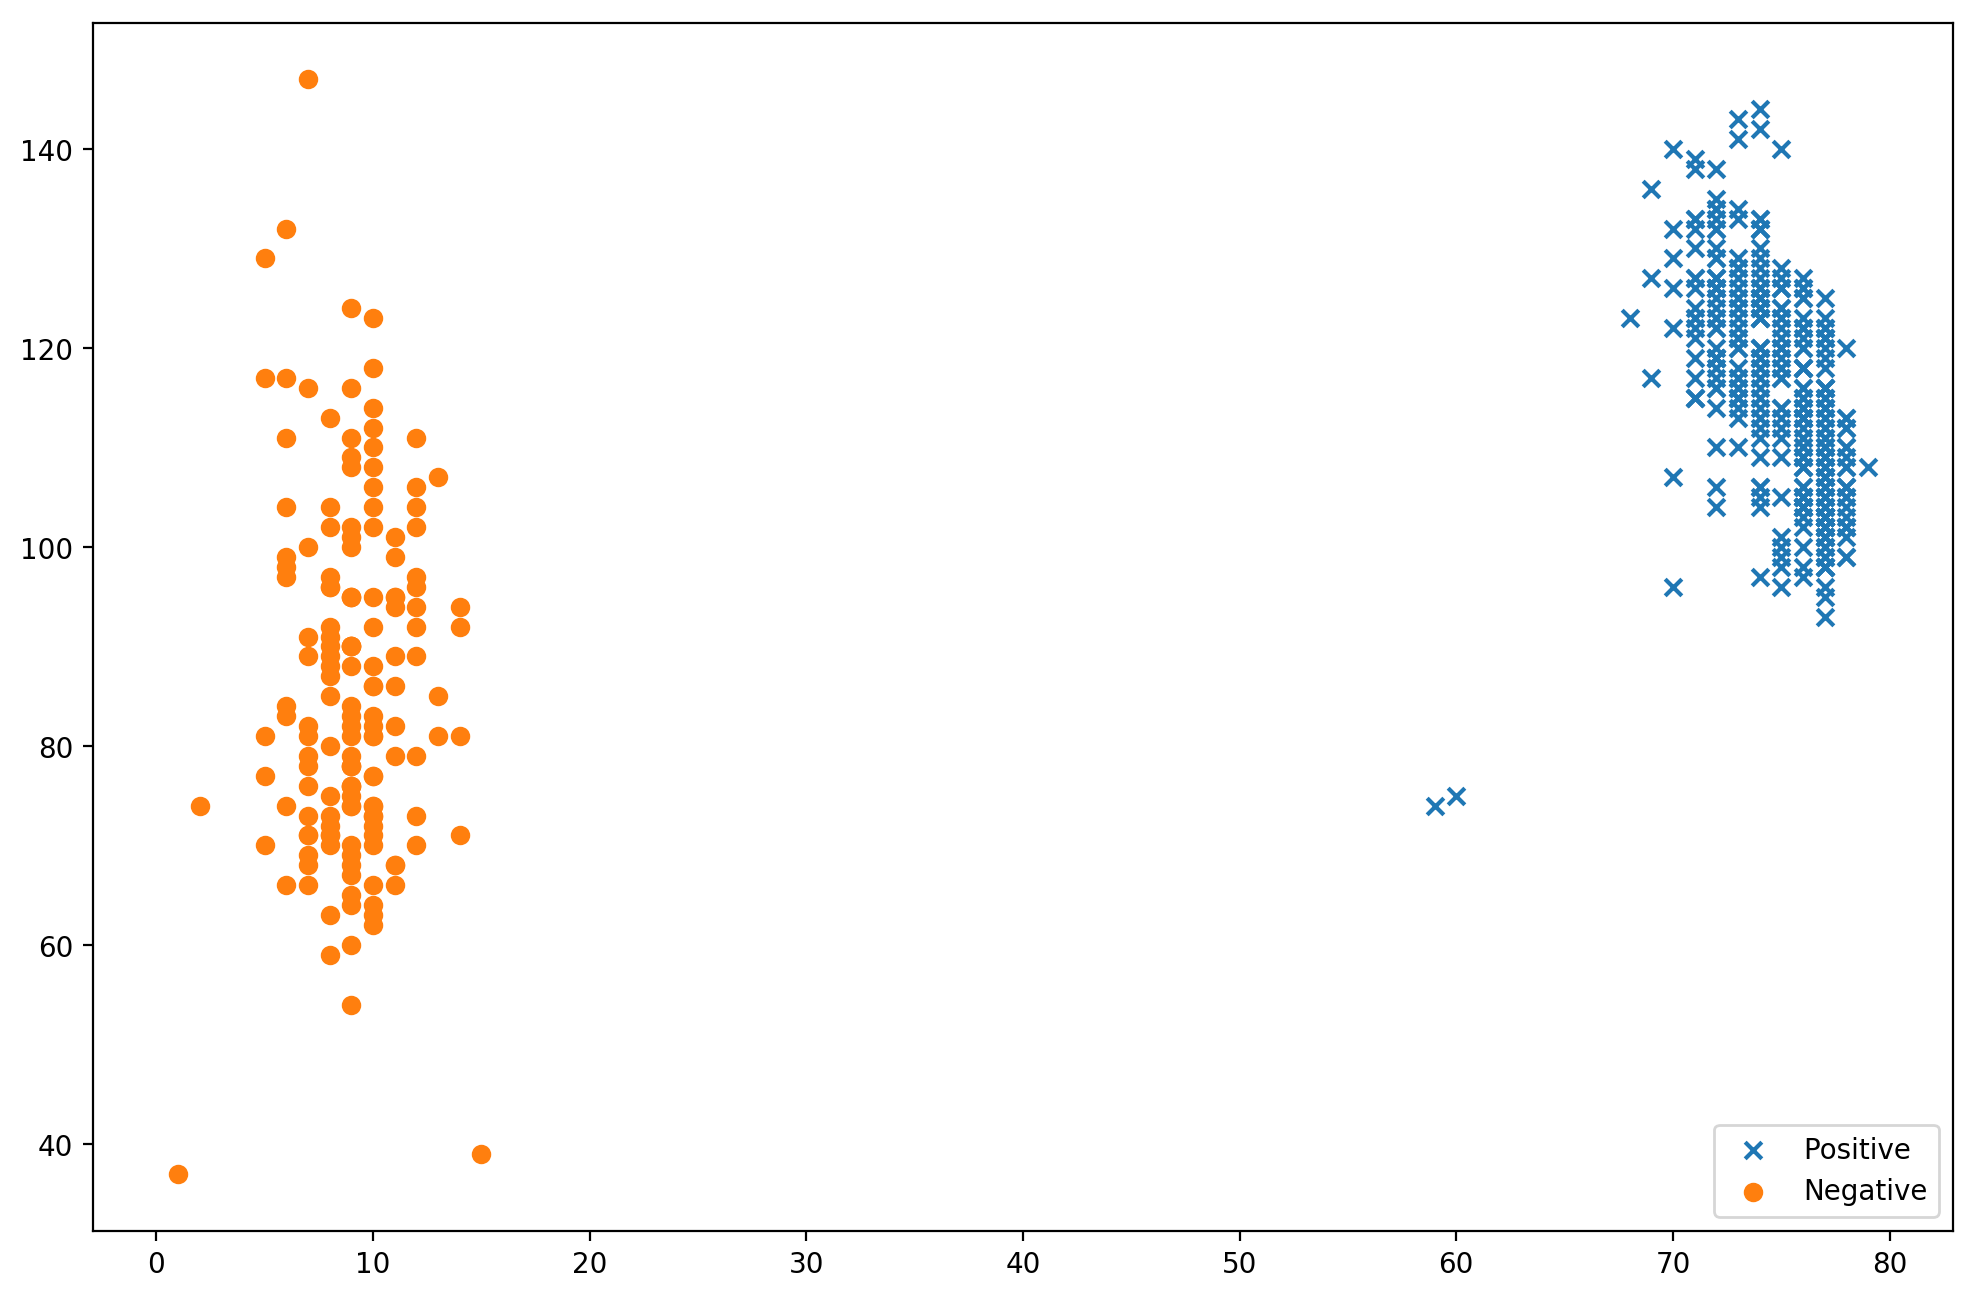

In [23]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positives[:,0], positives[:,1], marker='x', label='Positive')
ax.scatter(negatives[:,0], negatives[:,1], marker='o', label='Negative')
ax.legend()
plt.show()

Wir erzeugen einen SVM Klassifier mittels `svm.SVC`. Der Parameter C bestimmt den Fehlerterm, ein grösserer Wert von C zwingt die SVM mehr Samples richtig zu klassifizieren (auf Kosten von einer glätteren Entscheidungsfunktion).

In [24]:

classifier = svm.SVC(C=1.0)

Die Funktion `fit` trainiert den Klassifikator.

In [25]:
classifier.fit(data_reduced, classes_reduced)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Wir können die Qualität der Klassifikation mittels der Score Funktion Überprüfen. Dazu können wir auch den ganzen Datensatz benutzen, da die Auswertung (im Allgemeinen) wesentlich schneller als das Trainieren geht. Genau genommen hängt es von der Anzahl Support Vektoren ab.

In [26]:
classifier.score(data,classes)

0.9770286779835391

### Aufgabe 2: Validierung

Laden Sie nun das 2. Bild und überprüfen Sie, welchen Score dass sie auf diesem Bild erreichen mit der bereits trainierten SVM. 

Berechnen Sie dann die Klassifizierung, die der Classifier auf den Daten berechnet (mittels `predict`) und stellen Sie das Resultat wieder als Bild dar (mittels `reshape` können Sie das 1D Resultat wieder in ein 2D Bild umwandeln)

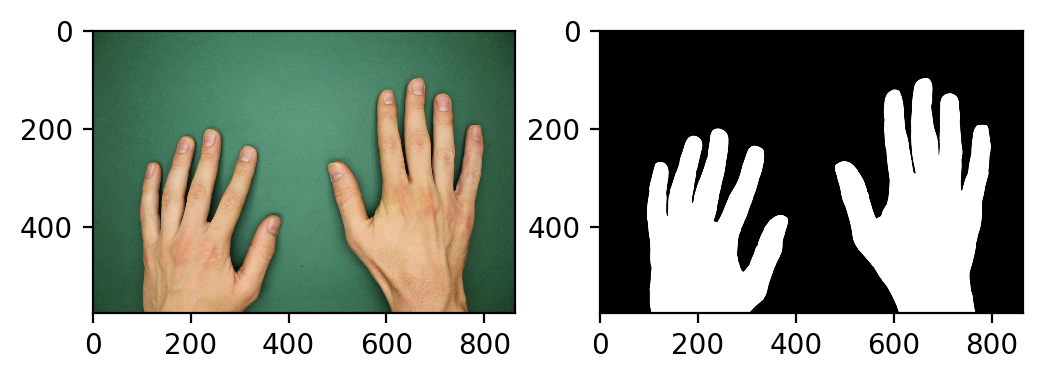

In [28]:
image2  = cv2.imread('images/hand_small_2.png')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
label2 = cv2.imread('images/label_small_2.png')
plt.subplot(1, 2, 1)
plt.imshow(image2)
plt.subplot(1, 2, 2)
plt.imshow(label2)
plt.show()

Verändern sie nun das n, das für das Downsampling verwendet wurde. Erhalten Sie bessere Ergebnisse mit kleinerem n? Wie sieht es aus, wenn Sie C ändern.

INFO: classes2.shape=(497664,)
(498,)
(498, 2)
(329, 2)
(163, 2)


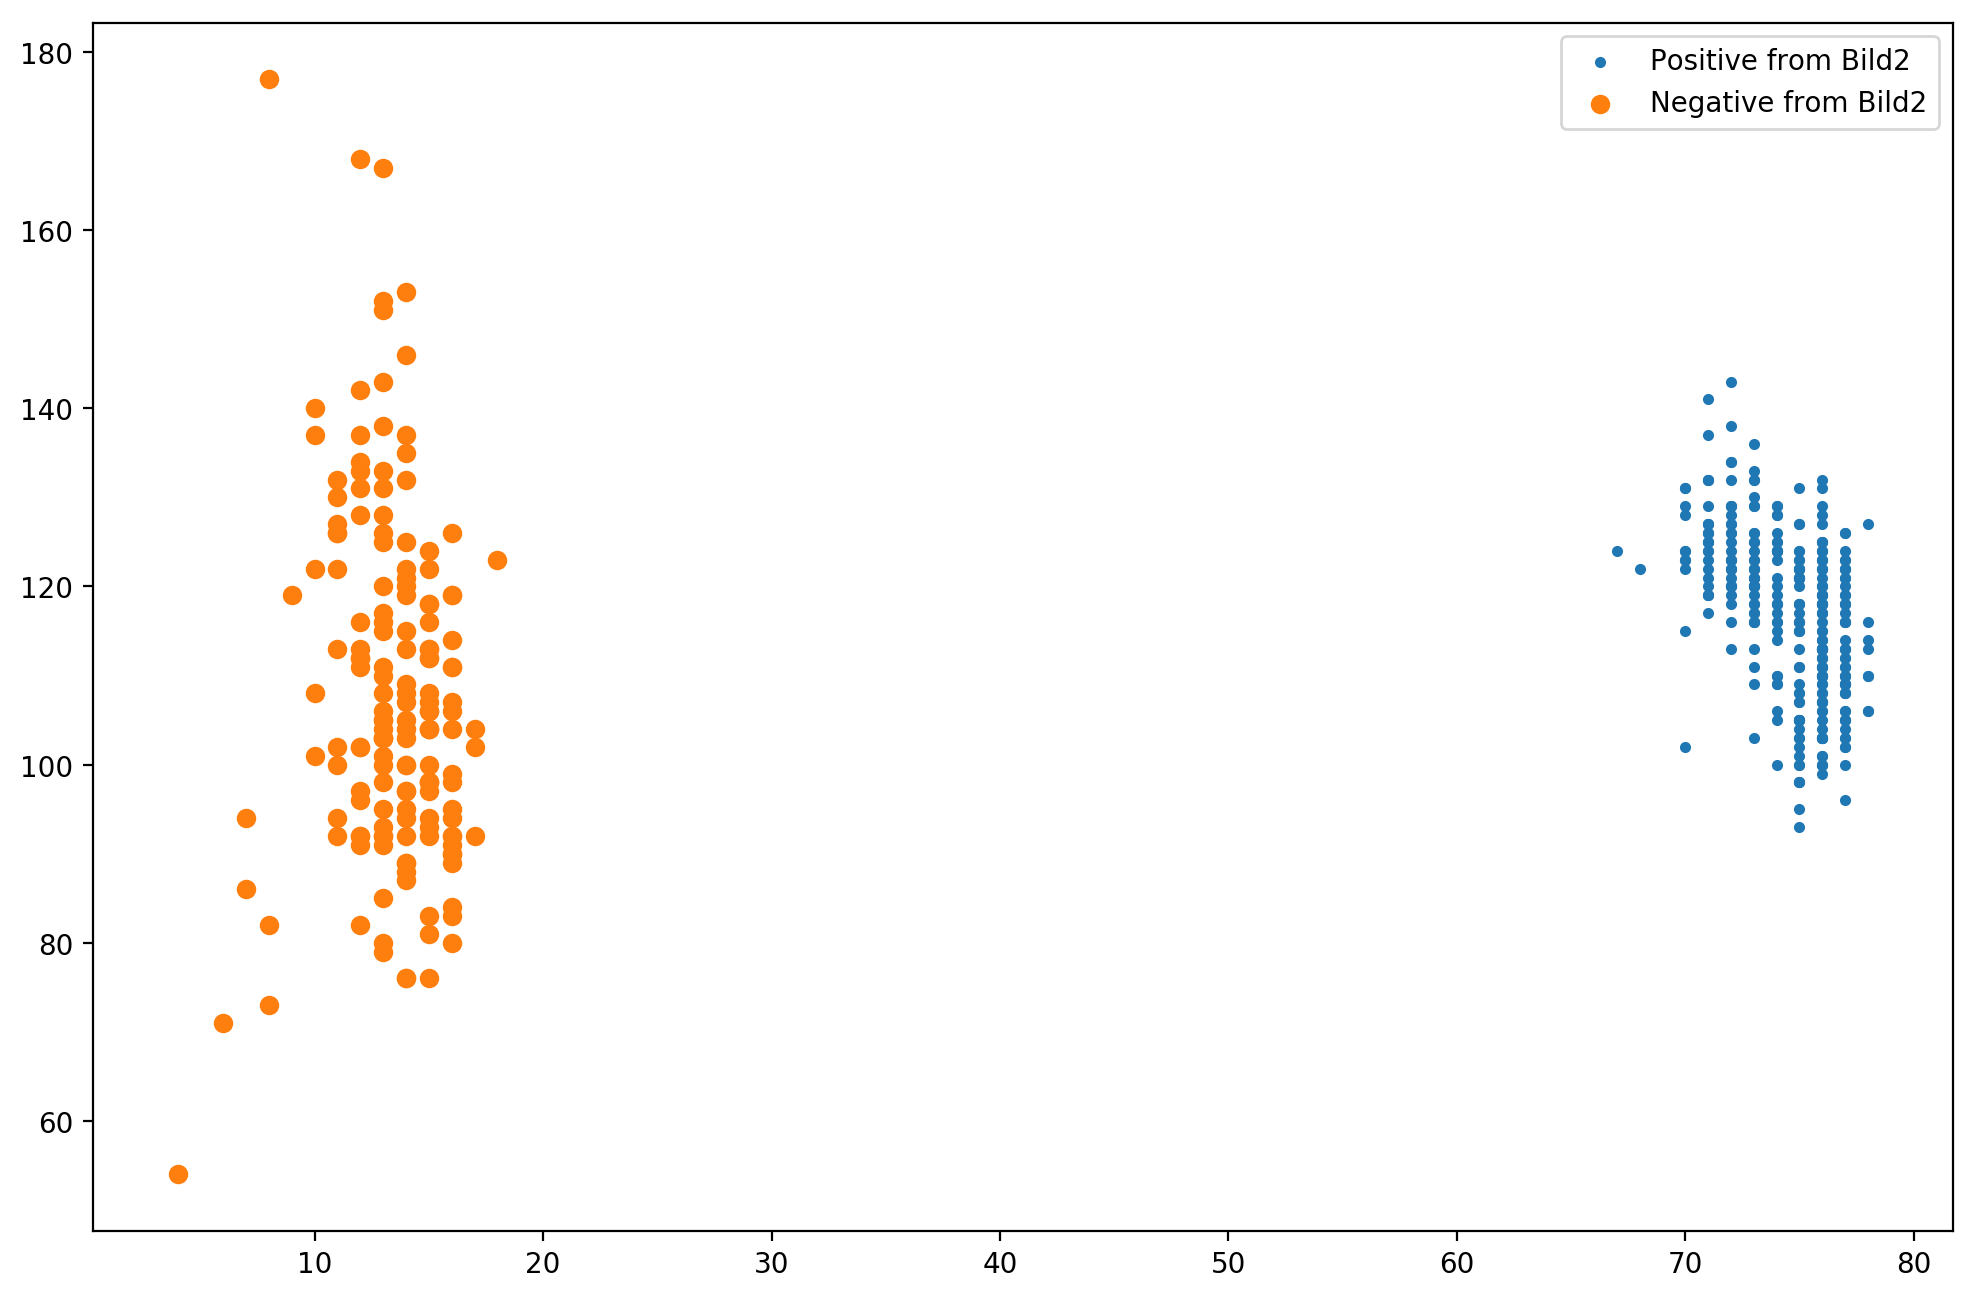

In [31]:
hsv2 = cv2.cvtColor(image2, cv2.COLOR_RGB2HSV)
hs2 = hsv2[:,:,0:2]
data2 = hs2.reshape((-1,2))
label_grey2 = label2[:,:,0]
classes2 = label_grey2.reshape(-1)
print("INFO: classes2.shape=" + str(classes2.shape))
n2 = 1000
classes_reduced2 = classes2[1::n2]
data_reduced2 = data2[1::n2,:]

positives2 = data_reduced2[classes_reduced2==0]
negatives2 = data_reduced2[classes_reduced2==255]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positives2[:,0], positives2[:,1], marker='.', label='Positive from Bild2')
ax.scatter(negatives2[:,0], negatives2[:,1], marker='o', label='Negative from Bild2')
ax.legend()


print(classes_reduced2.shape)
print(data_reduced2.shape)
print(positives2.shape)
print(negatives2.shape)

In [32]:
classifier.score(data2, classes2)

0.9783006204989712

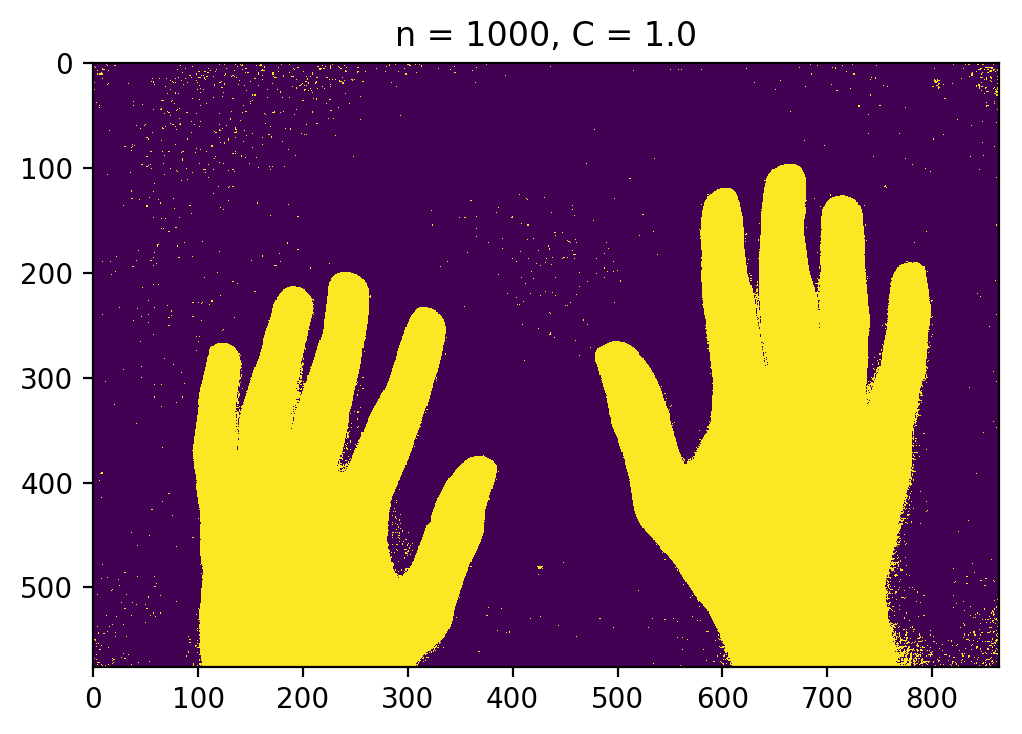

In [33]:
res_arr1 = classifier.predict(data2)
res_arr1.shape
res_img1 = res_arr1.reshape(576, -1)
res_img1.shape

plt.imshow(res_img1)
plt.title('n = 1000, C = 1.0')
plt.show()

In [ ]:
Das Training wird natuerlich extrem viel schneller mit kleinerem n.
Bis zum C=0.5 verändert sich der Score nicht
Ab C=0.2 ist der Score um einiges schlechter als noch bei C=0.7.